In [ ]:
#### 알고리즘 문제


문제 설명 
- 음악명으로 구성된 플레이리스트를 해당 음악의 아티스트 명을 참고해서 동일한 아티스트의 곡이 인접하지 않도록 플레이리스트를 셔플하는 알고리즘을 구현하시오
- 아래의 아티클을 보고 적합한 알고리즘을 구현하시오
(http://labs.spotify.com/2014/02/28/how-to-shuffle-songs/)

참고
- 반드시 셔플 기능을 구현해야 합니다.
- 매 실행마다 임의로 섞인 결과를 반환해야 합니다.
- 10000개 샘플 기준 **3초 이내**에 동작해야 합니다.
- 아티클 내용 이외에도 더 좋은 알고리즘이 있으면 그것을 구현해도 좋습니다.
- 아티클을 주의 깊게 읽어보시고 글의 목적을 파악하셔서 코드를 작성하시는 것이 필요합니다.
- Expected Output의 결과는 임의로 셔플한 결과이므로 반드시 Expected Output과 같을 필요는 없습니다.
- 한글처리에 주의하세요.
- 시간제한은 240분 입니다.

입력
- 입력의 첫 줄에는 테스트 케이스의 개수 T가 주어진다 (T<=10000)
- 각 테스트 케이스는 2줄로 구성되어 있다.
- 첫 줄에는 플레이리스트가 TSV(Tab Separated Value) 형태로 주어지고 이어서 다음 줄에는 아티스트가 TSV 형태로 주어집니다.
- 각 플레이리스트, 아티스트의 최대 길이는 4096을 넘지 않는다.

출력
- 각 테스트 케이스 별로 한줄로 적당히 셔플된 플레이리스트를 TSV 포맷으로 출력한다.
ex)
입력
1
Yesterday   Let it be   Gee   소원을 말해봐
Beatles      Beatles      소녀시대   소녀시대

출력
소원을 말해봐   Let it be   Gee   Yesterday


### 알고리즘 이해하기

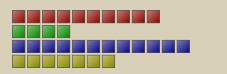

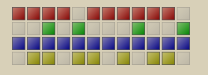

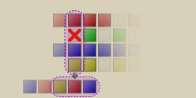

In [4]:
from random import shuffle
from collections import defaultdict
from copy import copy

song = 'Yesterday\tLet it be\tGee\t소원을 말해봐\t다시 만난 세계'.split('\t')
artist = 'Beatles\tBeatles\t소녀시대\t소녀시대\t소녀시대'.split('\t')

# artist = ['Beatles', 'Beatles', 'Beatles', '소녀시대', '소녀시대', '소녀시대', '소녀시대']
# song = ['Yesterday', 'let it be', 'Hey jude', '소원을 말해봐', 'Gee', '다만세', '소녀시대']

res = defaultdict(list)
for i, j in zip(artist, song):
    res[i].append(j)
    
n_songs=[]
for i,j in res.items():
    n_songs.append(j)

shuffle(n_songs)

for i in range(len(n_songs)):
    shuffle(n_songs[i]) 
n_songs.sort(reverse=True,key=lambda x: len(x))

max_length=len(n_songs[0])
for idx,i in enumerate(n_songs):
    n_songs[idx]=i+[None]*(max_length-len(i))

new_list=[[None for i in range(len(n_songs[0])) ] for _ in range(len(n_songs))]
new_list[0]=copy(n_songs[0])


def cnt_column(mylist,last):
    cnt_list=[0]*max_length
    for idx1,ele1 in enumerate(mylist[:last]):
        for idx2,ele2 in enumerate(ele1):
            if ele2!=None:
                cnt_list[idx2]+=1
    return cnt_list

import numpy as np
for idx1,ele1 in enumerate(n_songs[1:],1):
    cnt_check=cnt_column(n_songs,idx1)
    sort_index=np.argsort(cnt_check)

    for idx2, ele2  in enumerate(sort_index):

        new_list[idx1][ele2] = n_songs[idx1][idx2]


# print(new_list)


if 1 in cnt_column(new_list,len(new_list))[:-1]:
    print('\nyou cannot make perfect song list that has no adjacent same songs!!!!!!')
else:
#     print('\nfinal result')
    for idx1 in range(len(new_list[0])):
        for idx0 in range(len(new_list)):    
            if new_list[idx0][idx1]!=None:
                print(new_list[idx0][idx1], end='\t')

Gee	Let it be	다시 만난 세계	Yesterday	소원을 말해봐	